In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path = '/content/drive/MyDrive/Data Science/Portfolio/MP 3 - Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv'

df = pd.read_csv(dataset_path)

In [4]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

Terdapat null value pada kolom 'Income' sejumlah 24 baris sehingga akan dilakukan penghapusan.

In [6]:
df.shape

(2240, 30)

# Data Cleaning

In [7]:
# Menghapus null value pada kolom 'Income'

df.dropna(subset=['Income'], inplace=True)

In [8]:
df.duplicated().sum()

0

# Feature Engineering

In [9]:
# Hitung total campain
df['Total_Acc_Cmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# Hitung total pengeluaran
df['Total_Spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Hitung total jumlah pembelian
df['Total_Transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [10]:
# Hitung conversion rate
df['Conversion_Rate'] = df['Total_Transaction'] / df['NumWebVisitsMonth']

# Handle infinite values (jika ada pembagian dengan nol)
df['Conversion_Rate'].replace([np.inf, -np.inf], 0, inplace=True)

df.head()

<ipython-input-10-32a309fd1220>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Conversion_Rate'].replace([np.inf, -np.inf], 0, inplace=True)


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Acc_Cmp,Total_Spending,Total_Transaction,Conversion_Rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,3,11,1,0,1617000,25,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,3,11,0,0,27000,6,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,3,11,0,0,776000,21,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,3,11,0,0,53000,8,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,3,11,0,0,422000,19,3.800000


In [11]:
#Menambahkan kolom usia
df['Age'] = 2024 - df['Year_Birth']
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Acc_Cmp,Total_Spending,Total_Transaction,Conversion_Rate,Age
503,503,5140,1985,S3,Menikah,64355000.0,1,0,24-08-2012,66,...,0,0,3,11,0,0,1445000,21,2.625000,39
1302,1302,1878,1985,D3,Menikah,23148000.0,0,0,18-02-2014,83,...,0,0,3,11,0,0,37000,6,0.857143,39
1008,1008,8975,1968,S1,Menikah,19514000.0,1,1,26-01-2014,47,...,0,0,3,11,0,1,69000,10,1.250000,56
1028,1028,10175,1958,S3,Cerai,32173000.0,0,1,01-08-2013,0,...,0,0,3,11,0,0,22000,5,1.250000,66
2099,2099,3422,1975,S1,Menikah,76068000.0,0,1,29-11-2012,67,...,1,0,3,11,0,2,1376000,10,1.666667,49


In [12]:
print(df['Age'].min())
print(df['Age'].max())

28
131


In [13]:
# mengkategorikan berdasarkan usia
age_list = []
for i in df['Age']:
  if i < 36:
    age_list.append('Young Adult')
  elif i >= 36 and i < 56:
    age_list.append('Middle-Aged Adults')
  else:
    age_list.append('Seniors')

df['Age_Category'] = age_list

df["Age_Category"].value_counts()

,count
Age_Category,
Middle-Aged Adults,1132
Seniors,994
Young Adult,90


In [14]:
# Mengubah kolom 'Dt_Customer' ke Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Membuat kolom durasi membership
df['Membership_Duration'] = 2024 - df['Dt_Customer'].dt.year

df.value_counts('Membership_Duration')

,count
Membership_Duration,
11,1173
10,553
12,490


In [15]:
# total anak
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

df['Total_Children'].value_counts()

,count
Total_Children,
1,1117
0,633
2,416
3,50


# EDA

In [16]:
num = df.select_dtypes(include=['int64', 'float64']).columns
cat = df.select_dtypes(include=['object']).columns

print(f'Kolom numerik {len(num)}: {num}')
print(f'Kolom kategorikal {len(cat)}: {cat}')

Kolom numerik 33: Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Total_Acc_Cmp', 'Total_Spending',
       'Total_Transaction', 'Conversion_Rate', 'Age', 'Total_Children'],
      dtype='object')
Kolom kategorikal 3: Index(['Education', 'Marital_Status', 'Age_Category'], dtype='object')


In [17]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2216.0,1.121867e+03,6.431642e+02,0.0,566.75,1.120500e+03,1678.25,2239.0
ID,2216.0,5.588353e+03,3.249376e+03,0.0,2814.75,5.458500e+03,8421.75,11191.0
Year_Birth,2216.0,1.968820e+03,1.198555e+01,1893.0,1959.00,1.970000e+03,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,5.138150e+07,68522000.00,666666000.0
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.00,0.000000e+00,1.00,2.0
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.00,0.000000e+00,1.00,2.0
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,24.00,4.900000e+01,74.00,99.0
MntCoke,2216.0,3.050916e+05,3.373279e+05,0.0,24000.00,1.745000e+05,505000.00,1493000.0
MntFruits,2216.0,2.635605e+04,3.979392e+04,0.0,2000.00,8.000000e+03,33000.00,199000.0
MntMeatProducts,2216.0,1.669959e+05,2.242833e+05,0.0,16000.00,6.800000e+04,232250.00,1725000.0


In [18]:
df[cat].describe().T

,count,unique,top,freq
Education,2216,5,S1,1116
Marital_Status,2216,6,Menikah,857
Age_Category,2216,3,Middle-Aged Adults,1132


In [19]:
# Cek unique value setiap kolom
for column_name in df.columns:
    unique_values = df[column_name].unique()
    unique_values_str = ", ".join(map(str, unique_values))

    print(f"Unique values in '{column_name}', {df[column_name].nunique()} nunique:\n == {unique_values_str} == \n")

Unique values in 'Unnamed: 0', 2216 nunique:
 == 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 22

In [20]:
df.duplicated().sum()

0

# Univariate Analysis

Numerical Columns

<ipython-input-21-23fa62709a37>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[col], fill=True)
<ipython-input-21-23fa62709a37>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[col], fill=True)


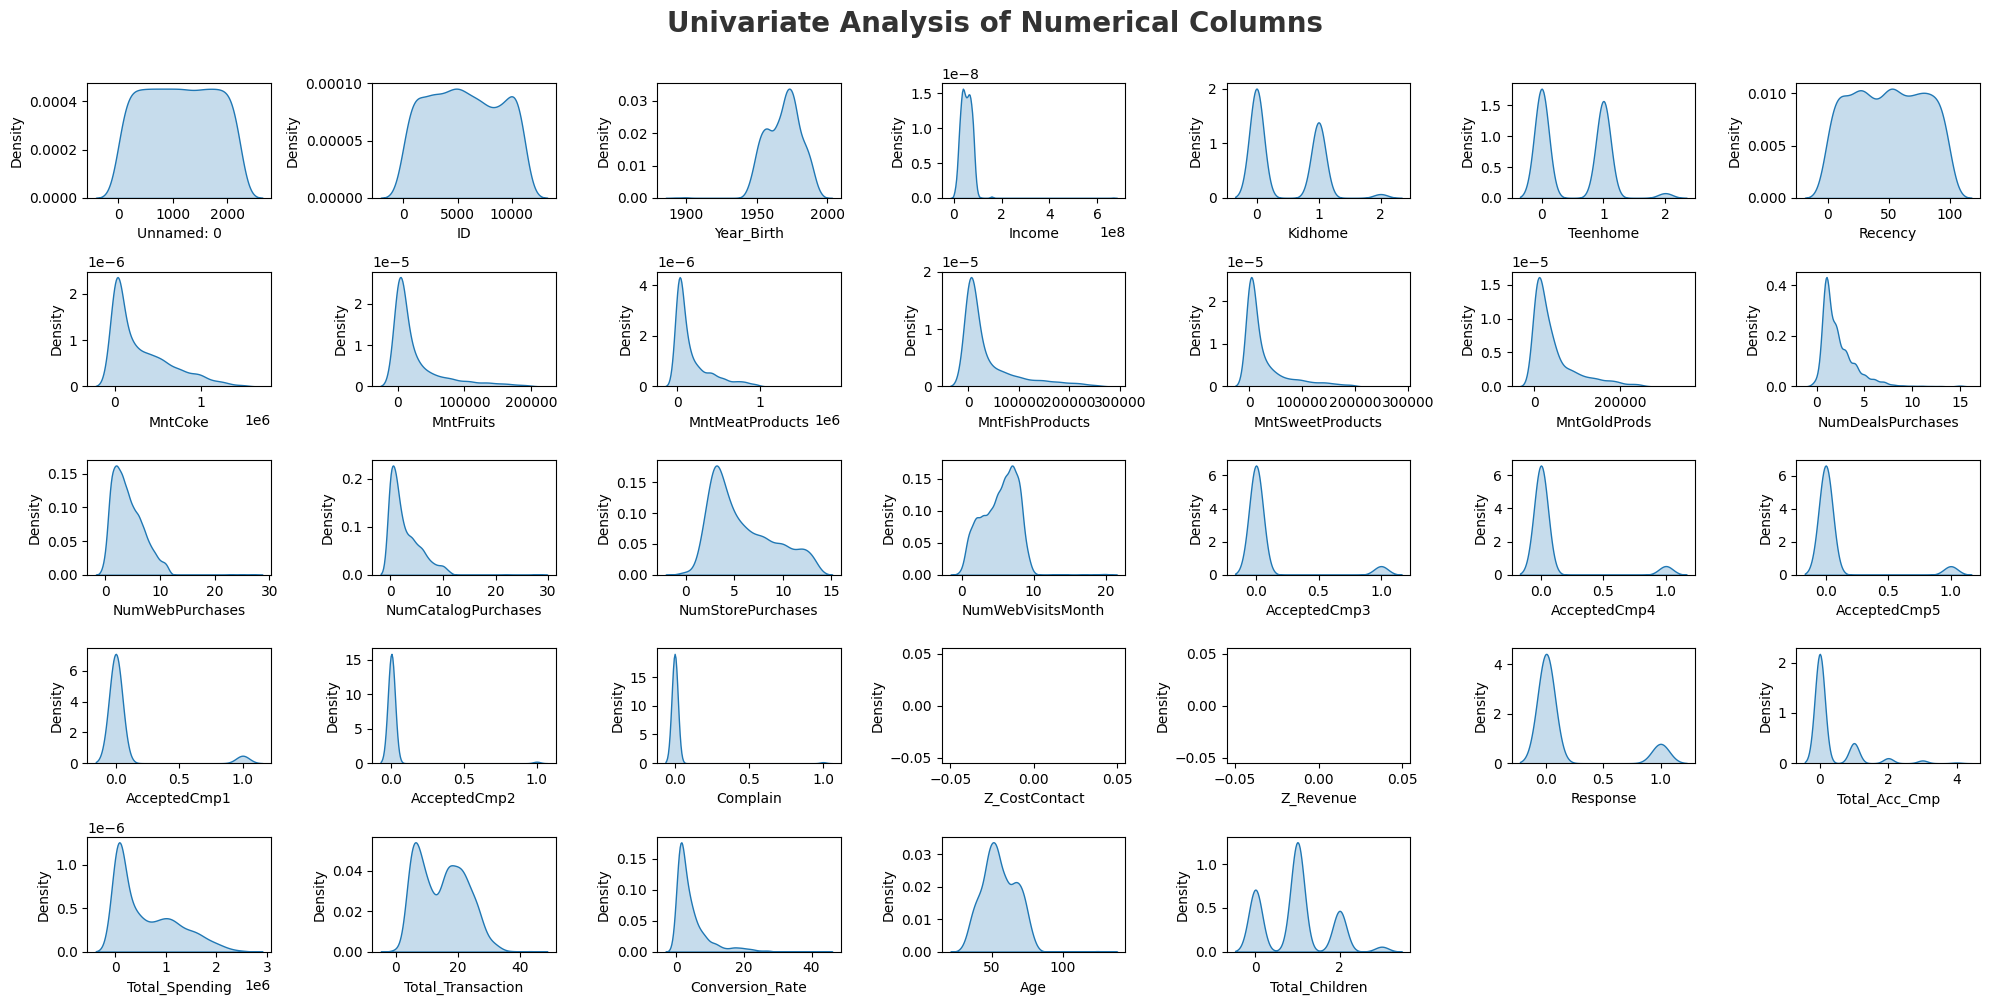

In [21]:
plt.figure(figsize=(20,10))

for i,col in enumerate(num):
  plt.subplot(5,7,i+1)
  sns.kdeplot(data=df[col], fill=True)
  plt.xlabel(col)

plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

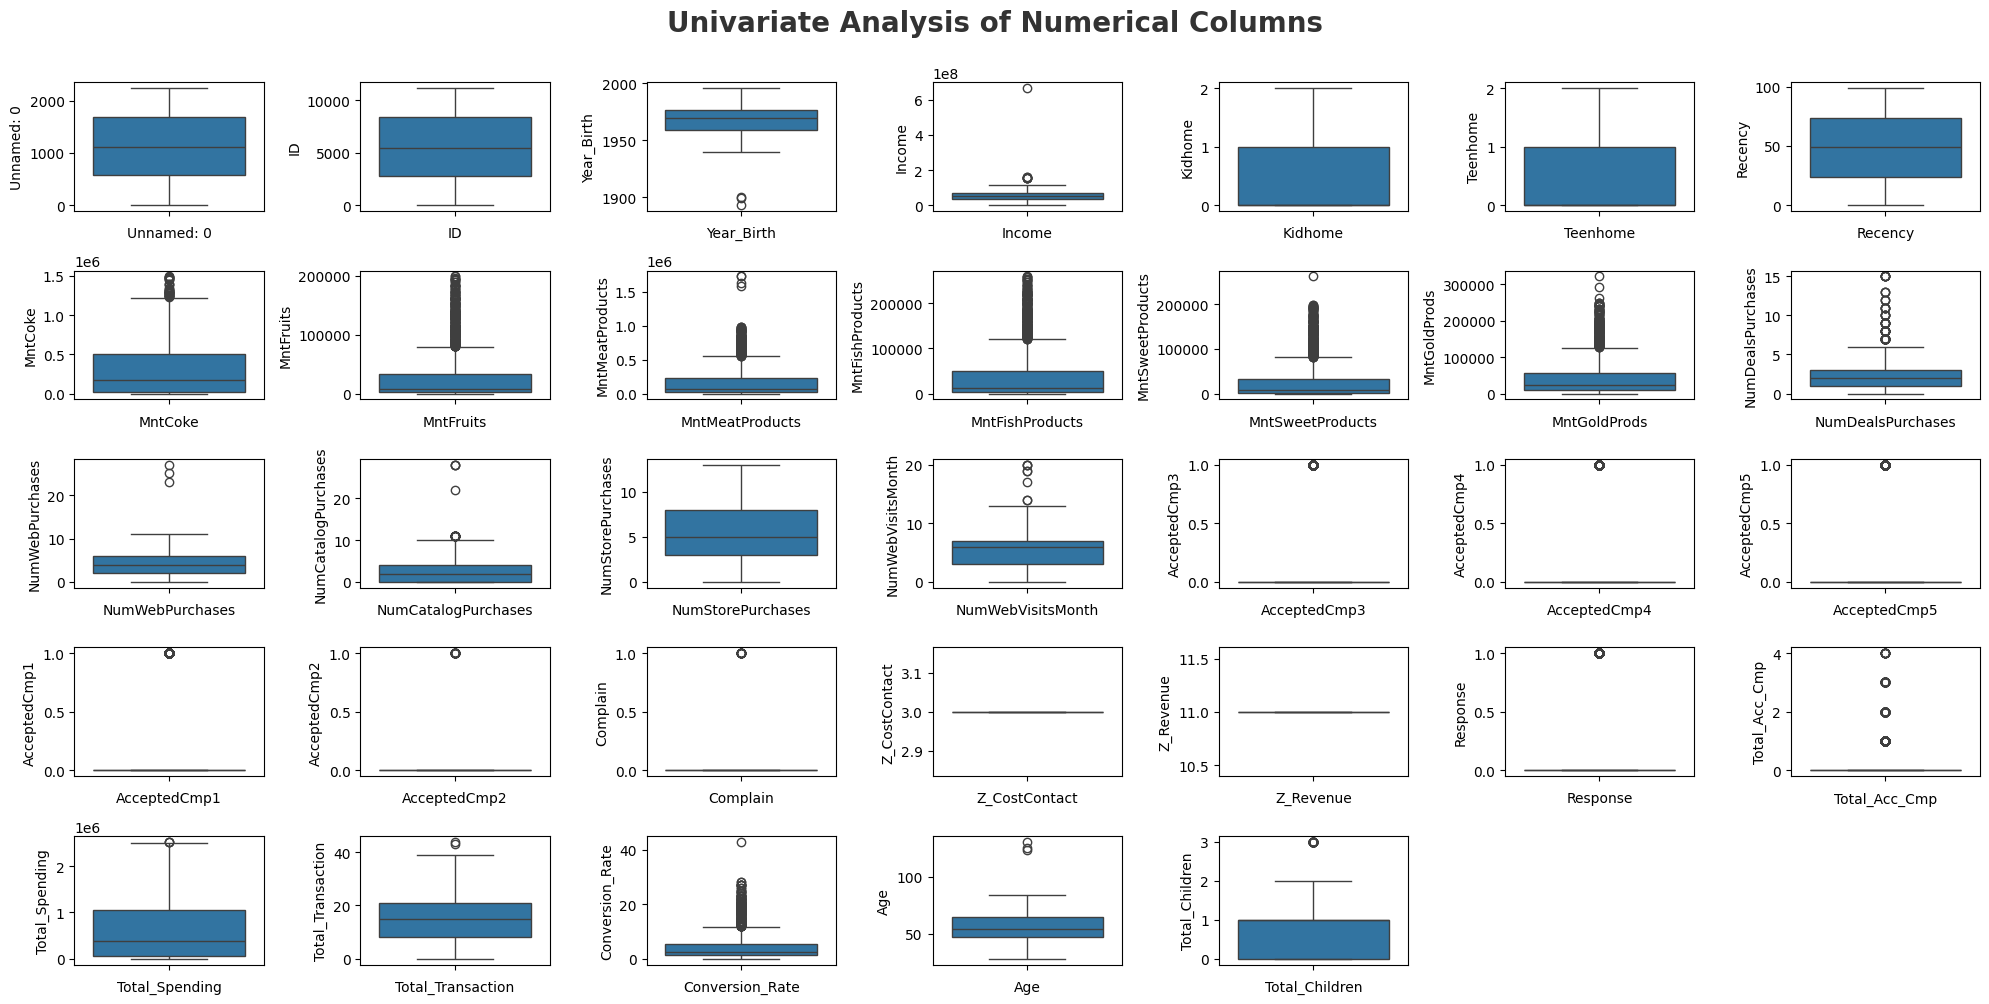

In [22]:
plt.figure(figsize=(20,10))

for i,col in enumerate(num):
  plt.subplot(5,7,i+1)
  sns.boxplot(data=df[col], fill=True)
  plt.xlabel(col)

plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

Terdapat outlier pada beberapa kolom diantaranya :

['Year_birth', 'Income', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Total_Transaction', 'Total_Spending', 'Conversion_Rate', 'Age']

Yang selanjutnya kolom kolom tersebut akan dilakukan penghapusan outliers.

In [23]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
outliers = ['Year_Birth', 'Income', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Total_Transaction', 'Total_Spending', 'Conversion_Rate', 'Age']

filtered_entries = np.array([True] * len(df))
for col in outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 1468


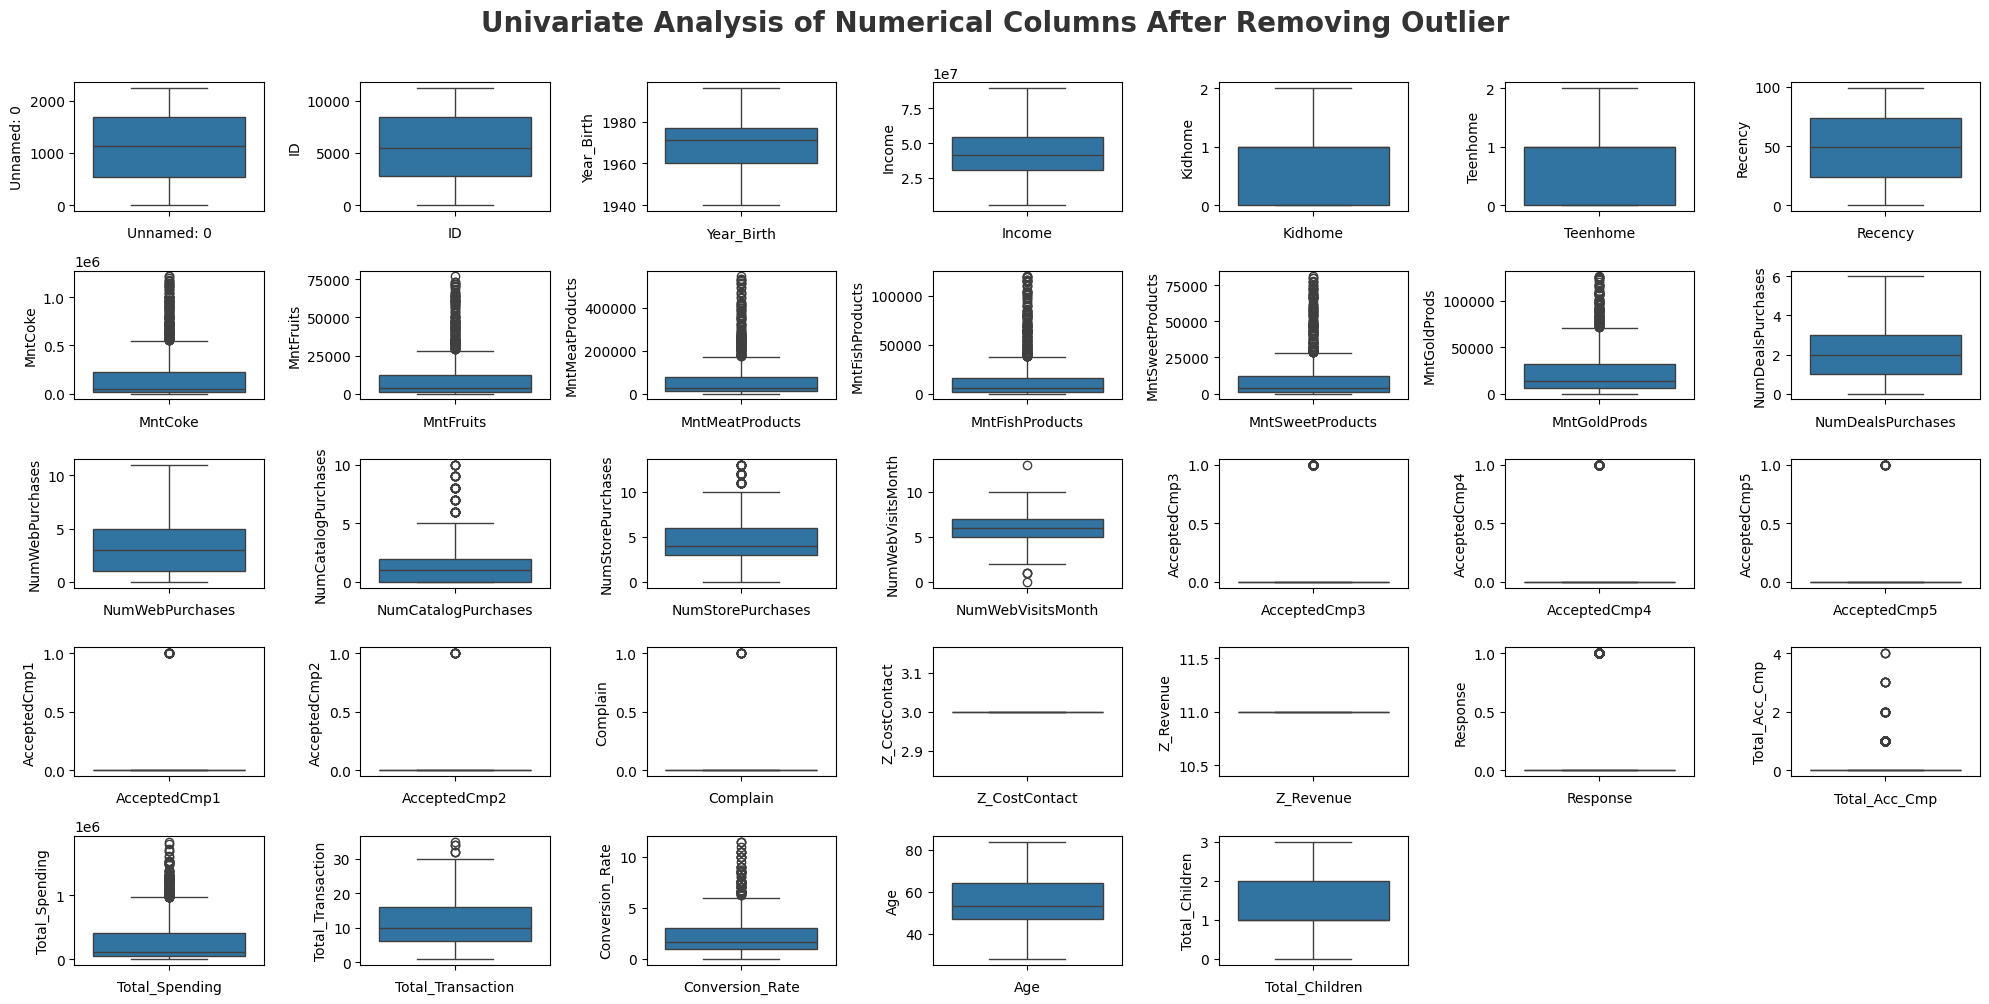

In [24]:
plt.figure(figsize=(20,10))

for i,col in enumerate(num):
  plt.subplot(5,7,i+1)
  sns.boxplot(data=df[col], fill=True)
  plt.xlabel(col)

plt.suptitle('Univariate Analysis of Numerical Columns After Removing Outlier', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

Categorical Columns

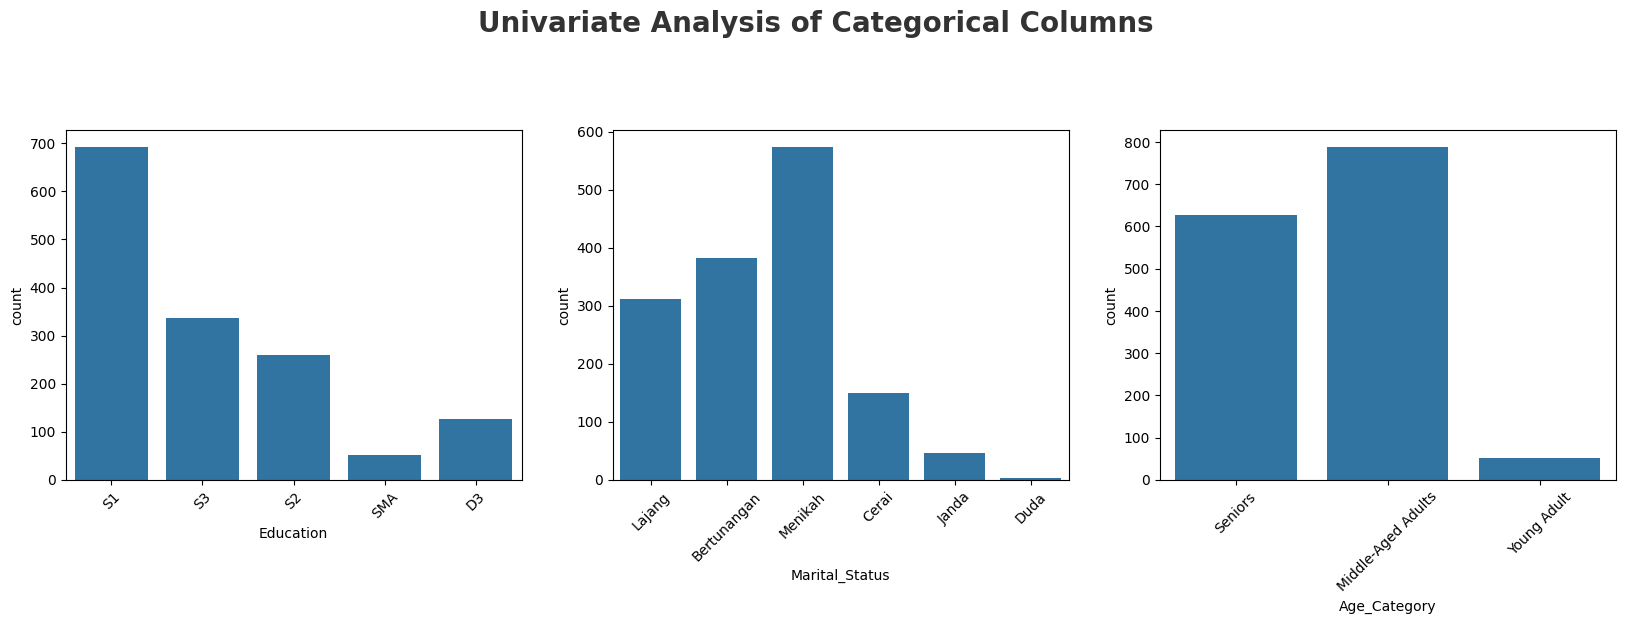

In [25]:
plt.figure(figsize=(20,10))

for i, col in enumerate(cat):
  plt.subplot(2, len(cat), i+1)
  sns.countplot(data=df[cat], x=col)
  plt.xlabel(col)
  plt.xticks(rotation=45)
  plt.xlabel(col)

plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout
plt.show()

Customer didominasi dengan educataion S1, status pernikahan menikah, dan kategori usia Middle-Aged Adults.

# Bivariate Analysis

In [26]:
df_pct = df.groupby('Age_Category').agg({'Conversion_Rate':'sum'}).reset_index()
df_pct['sum_cvr'] = df_pct['Conversion_Rate'].sum()
df_pct['pct'] = round((df_pct['Conversion_Rate']/df_pct['sum_cvr'])*100, 2)

df_pct

,Age_Category,Conversion_Rate,sum_cvr,pct
0,Middle-Aged Adults,1522.629304,3374.290812,45.12
1,Seniors,1762.405952,3374.290812,52.23
2,Young Adult,89.255556,3374.290812,2.65


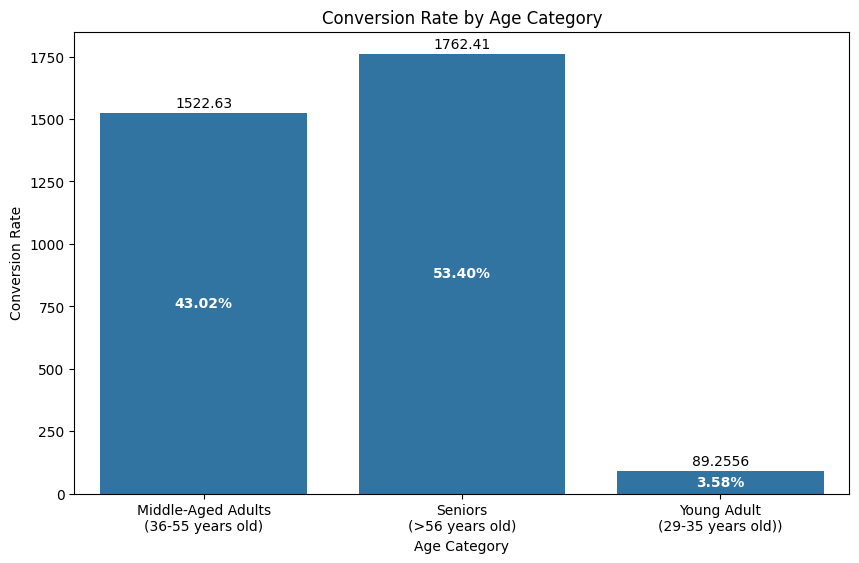

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Conversion_Rate', data=df_pct)
plt.title('Conversion Rate by Age Category')

plt.xticks(np.arange(3), ['Middle-Aged Adults\n(36-55 years old)', 'Seniors\n(>56 years old)', 'Young Adult\n(29-35 years old))'])
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['43.02%', '53.40%', '3.58%'], label_type='center', color='white', weight='bold')


plt.xlabel('Age Category')
plt.ylabel('Conversion Rate')
plt.show()

Berdasarkan plot diatas terdapat hubungan yang signifikan antara conversion rate dengan age category. Dimana kategori young adult memilki convertion rate yang sangat rendah (3.58%) jika dibandingkan dengan kategori Midle-Aged Adults (43.02%) dan Senior(53.40%).

Convertion Rate VS Age, Income, Total Spending

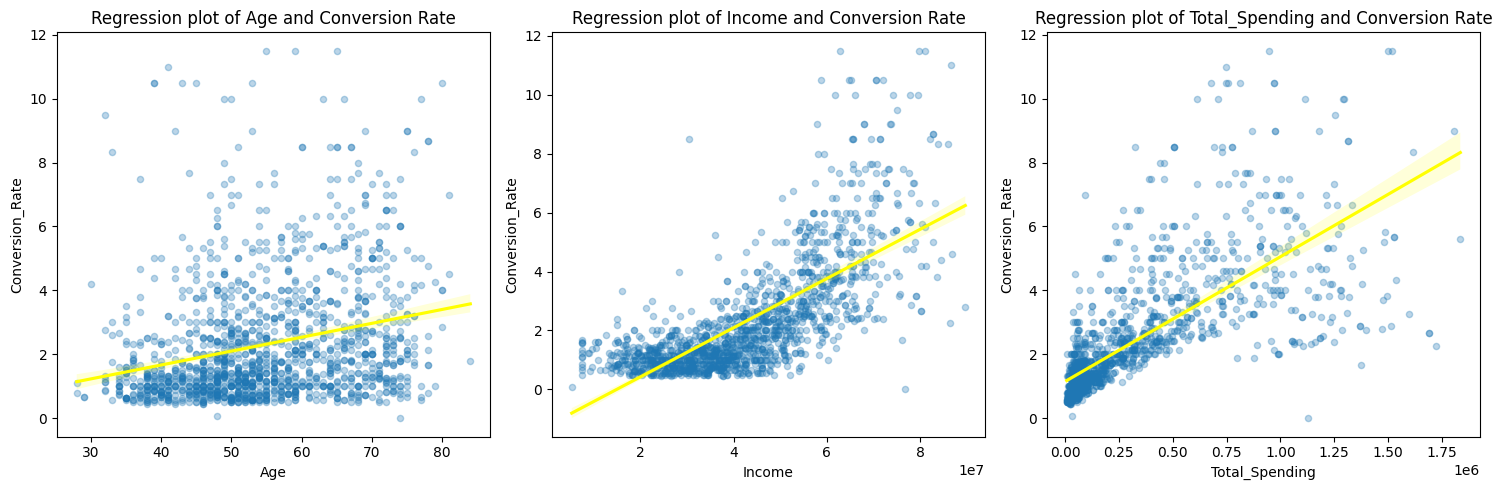

In [28]:
variable = ['Age', 'Income', 'Total_Spending']

plt.figure(figsize=(15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df[variable[var]], y='Conversion_Rate', data=df, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'yellow'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()

Conclusion :
1. Age dan conversion rate :

  Terlihat korelasi positif lemah antara umur dan tingkat konversi. Semakin bertambah usia, tingkat konversi cenderung meningkat, tetapi hubungan ini tidak terlalu kuat.Ini bisa berarti bahwa usia yang lebih tua sedikit lebih cenderung untuk terlibat atau berkonversi, mungkin karena stabilitas finansial atau preferensi belanja tertentu.

2. Income dan conversion rate :
  
  Hubungan korelasi positif kuat antara pendapatan (Income) dan tingkat konversi. Hal ini menunjukan bahwa semakin tinggi pendapatan, tingkat konversi cenderung meningkat. Ini menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi lebih cenderung terlibat atau melakukan pembelian.

3. Total spending dan conversion rate :

  Korelasi positif yang kuat antara pengeluaran total (Total Spending) dan tingkat konversi. Hal ini menunjukan bahwa pelanggan dengan pengeluaran lebih tinggi juga menunjukkan tingkat konversi yang lebih tinggi. Hubungan ini bisa menunjukkan bahwa pelanggan dengan keterlibatan yang lebih besar pada kampanye pemasaran memiliki pengeluaran yang lebih besar, sehingga meningkatkan Conversion Rate.

Strategi pemasaran bisa difokuskan pada pelanggan dengan pendapatan dan pengeluaran tinggi, karena mereka memiliki peluang konversi lebih besar.


Age VS Income, Total Spending

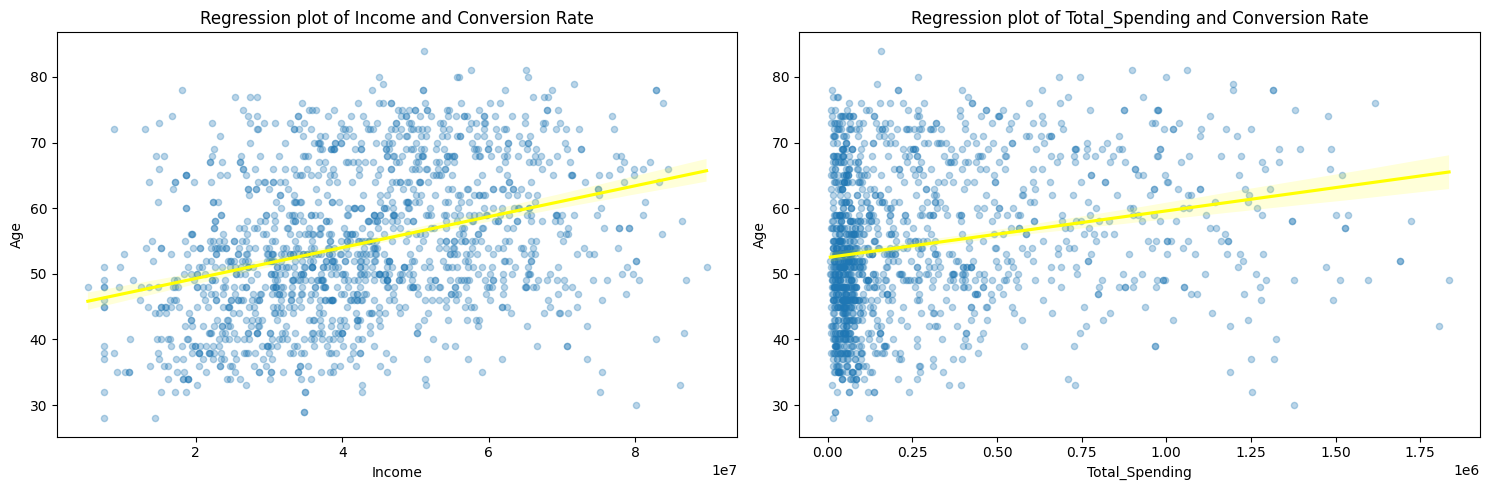

In [29]:
variable = ['Income', 'Total_Spending']

plt.figure(figsize=(15,5))
for var in range(0, len(variable)):
  plt.subplot(1, 2, var+1)
  sns.regplot(x=df[variable[var]], y='Age', data=df, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'yellow'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
  plt.tight_layout()

Conclusion :
1. Age dan Income :

  Terdapat hubungan positif  antara pendapatan (Income) dan usia (Age). Korelasi ini tidak sangat kuat, mengindikasikan faktor lain seperti tingkat pendidikan atau pekerjaan juga berpengaruh.

2. Age dan Total spending :

  Ada hubungan positif lemah antara total pengeluaran (Total Spending) dan usia (Age). Usia yang lebih tua cenderung dihubungkan dengan pengeluaran yang sedikit lebih tinggi. Namun, hubungan ini lebih lemah dibandingkan dengan "Income vs Age", yang menunjukkan bahwa pengeluaran tidak selalu sebanding dengan usia.

Strategi pemasaran bisa diarahkan pada segmen usia yang lebih tua (50 ke atas) dengan pendapatan tinggi, karena mereka memiliki potensi untuk pengeluaran lebih besar.



# Multivariate Analysis

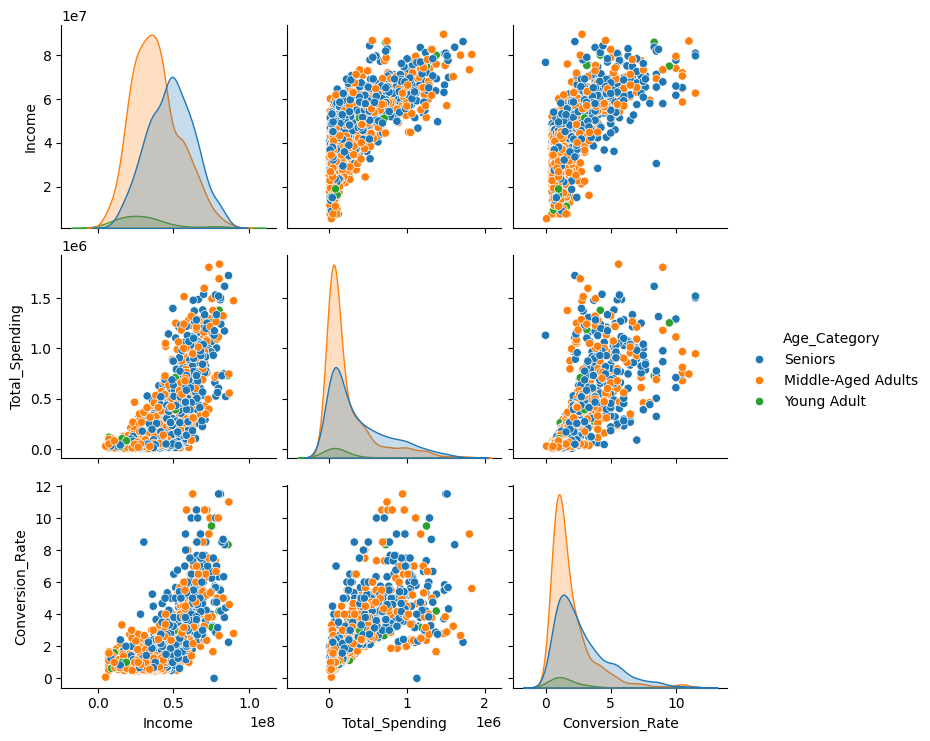

In [30]:
# prompt: buatkan grafik mutivariate analysis

# Import necessary libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains the columns 'Income', 'Total_Spending', 'Conversion_Rate', and 'Age'

# Pairplot for multivariate analysis
sns.pairplot(df[['Income', 'Total_Spending', 'Conversion_Rate', 'Age_Category']],hue = 'Age_Category',diag_kind='kde')
plt.show()



Conclusion :
- Middle-Aged Adults adalah kelompok dominan dalam pendapatan, pengeluaran, dan tingkat konversi.
- Ada hubungan positif yang kuat antara pendapatan, pengeluaran, dan tingkat konversi, tetapi dengan variasi yang lebih tinggi di beberapa kategori usia.
- Young Adults dan Seniors cenderung memiliki nilai yang lebih rendah dibandingkan Middle-Aged Adults.

Suggestion :
1. Fokus pada Middle_Age Adult sebagai segmen utama :
  
  - Buat kampanye pemasaran yang ditagetkan pada segmen ini.
  - Tawarkan produk atau layanan  premium sesuai daya beli mereka.
  - Perkuat loyalitas dengan program member, diskon eksklusif, penawaran berbasis langganan.
2. Membuat strategi khusus untuk segmen senior :
  
  - Kembangkan layanan yang memprioritaskan kenyamanan dan kebutuhan mereka(misalnya, layanan berbasis kesehatan atau kenyamanan).
  - Gunakan pendekatan pemasaran yang lebih personal, seperti konsultasi langsung atau pemasaran offline.  
3. Optimalkan hubungan pendapatan, tigkat pembelian, dan konversi :

  - Buat program upselling dan cross-selling untuk mendorong pengeluaran pelanggan.
  - Tawarkan insentif berbasis pengeluaran (contoh: "Dapatkan diskon jika belanja lebih dari X").
  - Gunakan data analitik untuk mengidentifikasi pelanggan bernilai tinggi dan tingkatkan konversi mereka.

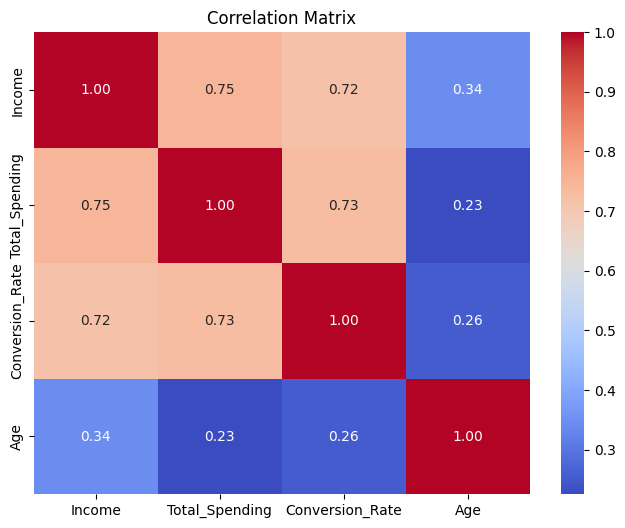

In [31]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Income', 'Total_Spending', 'Conversion_Rate', 'Age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Terdapat korelasi yang tinggi antara : Income vs Total_Spending, Income vs Conversion_Rate, Convesion_Rate vs Total_Spending. Yang artinya jika satu fitur mengalami peningkatan maka fitr yang lain turut mengalami peningkatan.

# Data Preprocessing

In [32]:
df_cln = df.copy()

In [33]:
df_cln.duplicated().sum()

0

In [34]:
df_cln.isnull().sum()

,0
Unnamed: 0,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0


In [35]:
# Feature Encoding
df['Education'].value_counts()

edu = {'SMA' : 0, 'D3' : 1, 'S1' : 2, 'S2' : 3, 'S3' : 4}

df_cln['Education'] = df_cln['Education'].map(edu)

In [36]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 1 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1468 non-null   int64         
 1   ID                   1468 non-null   int64         
 2   Year_Birth           1468 non-null   int64         
 3   Education            1468 non-null   int64         
 4   Marital_Status       1468 non-null   object        
 5   Income               1468 non-null   float64       
 6   Kidhome              1468 non-null   int64         
 7   Teenhome             1468 non-null   int64         
 8   Dt_Customer          1468 non-null   datetime64[ns]
 9   Recency              1468 non-null   int64         
 10  MntCoke              1468 non-null   int64         
 11  MntFruits            1468 non-null   int64         
 12  MntMeatProducts      1468 non-null   int64         
 13  MntFishProducts      1468 non-null   i

In [37]:
df_clean = df_cln.copy()
df_clean = df_clean.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Age_Category', 'Dt_Customer'], axis=1)

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_clean= pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [39]:
df_clean.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Total_Acc_Cmp,Total_Spending,Total_Transaction,Conversion_Rate,Age,Membership_Duration,Total_Children
0,0.234869,0.758909,0.791868,-0.372307,-0.645672,-0.598281,-0.638292,-0.551351,-0.586495,-0.689993,...,0.0,0.0,-0.339855,-0.365979,-0.746520,-0.858633,-0.572821,1.366457,-1.362157,1.254425
1,1.767172,-1.085592,-1.047471,-0.785314,0.974825,2.830253,0.742790,4.468154,0.780457,0.731247,...,0.0,0.0,-0.339855,-0.365979,1.342310,1.414129,1.538959,0.391486,0.100642,-1.725342
2,-0.959611,0.758909,-1.047471,-0.785314,-0.645672,-0.383997,-0.478497,-0.182947,-0.449800,-0.729472,...,0.0,0.0,-0.339855,-0.365979,-0.674011,-0.555599,-0.503297,-1.292556,-1.362157,-0.235458
3,0.959452,0.758909,-1.047471,1.555061,-0.013092,2.401686,0.640065,1.474871,1.190542,-0.334683,...,0.0,0.0,-0.339855,-0.365979,0.355066,1.111094,0.782890,-1.026654,-1.362157,-0.235458
4,1.215351,-1.085592,0.791868,-1.129487,1.341877,2.330258,0.411787,-0.643452,2.215756,-0.374162,...,0.0,0.0,-0.339855,-0.365979,1.174981,1.565646,0.713366,0.214218,0.100642,-0.235458


# Modeling

In [40]:
df_model = df_clean.copy()

In [41]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=2)
pca.fit(df_model)

# Transformasikan data ke ruang fitur baru
pca_data = pca.transform(df_model)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# Menampilkan DataFrame
print(pca_df.head())

        PC1       PC2
0 -2.190879 -0.990998
1  5.380192 -1.023377
2 -2.357484  0.365173
3  2.368557 -1.226815
4  3.952642 -1.360936


In [42]:
from sklearn.cluster import KMeans

distortions = []
K = range(1, 10)  # Jumlah cluster dari 1 hingga 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    distortions.append(kmeans.inertia_)

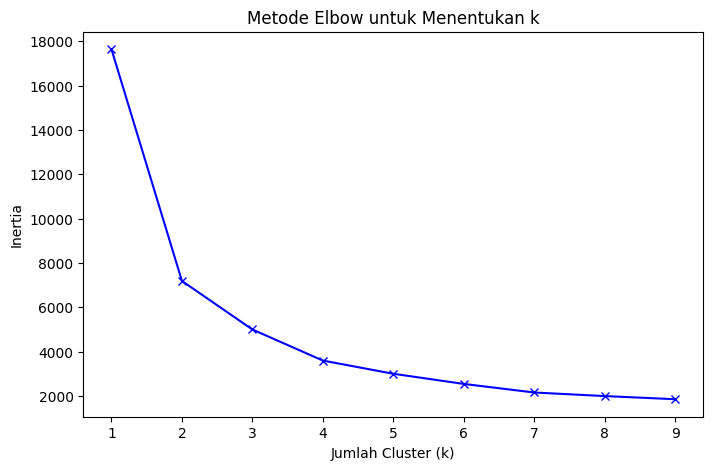

In [43]:
# Visualisasi dengan elbow method

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k')
plt.show()

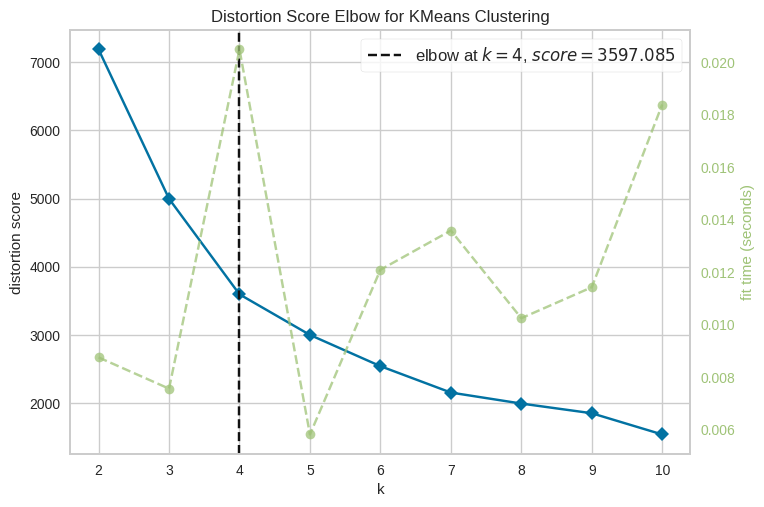

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# visualisasi dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(pca_df)
visualizer.show()

Berdasarkan Distortion Score dan Elbow methode didapatkan jumlah cluster terbaik adalah 4

## Clustering with K-Means

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_df.values)

# Menambahkan label cluster ke dataset
pca_df['Cluster'] = kmeans.labels_

In [46]:
pca_df.head()

,PC1,PC2,Cluster
0,-2.190879,-0.990998,1
1,5.380192,-1.023377,0
2,-2.357484,0.365173,1
3,2.368557,-1.226815,3
4,3.952642,-1.360936,0


Text(0.5, 1.0, 'Cluster Segementation')

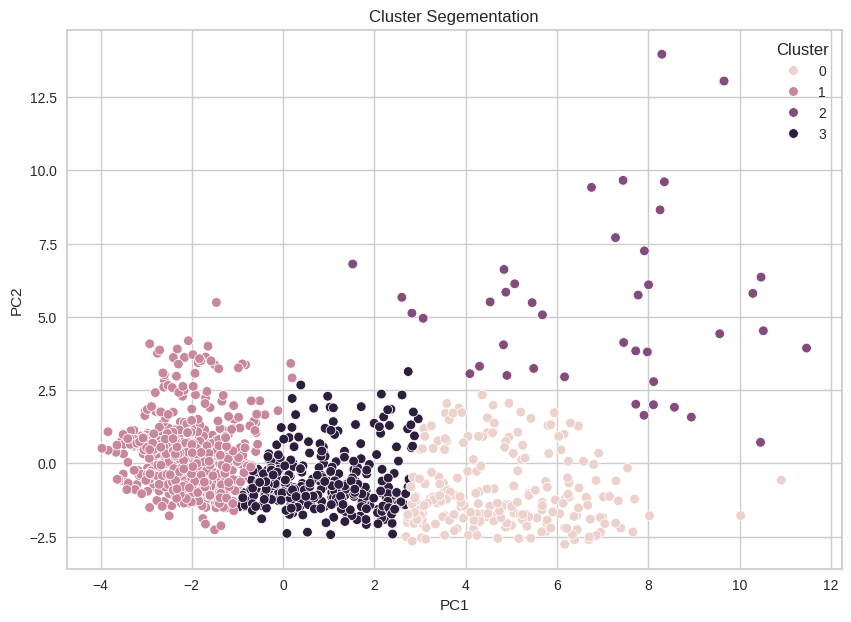

In [47]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster')
plt.title('Cluster Segementation')

# Evaluasi

In [48]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5832898419362629


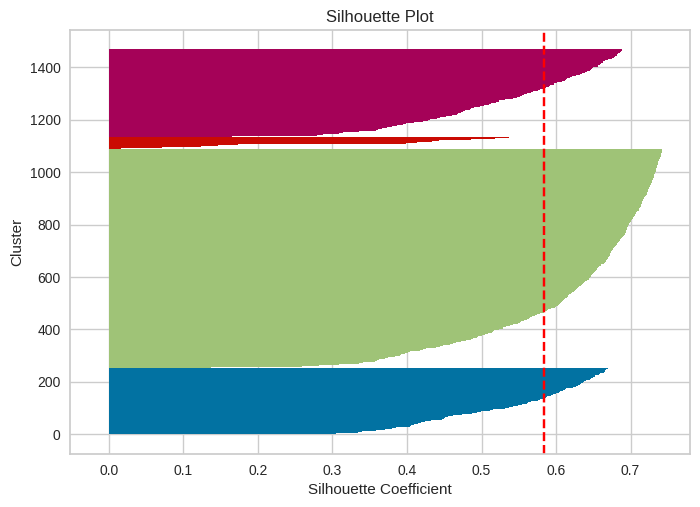

In [49]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

silhouette_vals = silhouette_samples(pca_df, kmeans.labels_)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(kmeans.labels_)):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Plot')
plt.show()


## Summary

  1. Berdasarkan Silhouette Score, jumlah cluster terbaik yang direkomendasikan adalah 4.
  2. Hasil Clustering: Sebagian besar data dikelompokkan dengan baik (silhouette coefficient positif), meskipun ada beberapa data dengan nilai negatif.
  3. Rata-rata Silhouette: Garis merah menunjukkan hasil clustering cukup baik (mendekati atau melebihi 0.5).

In [50]:
df_cln['Cluster'] = kmeans.labels_

In [51]:
feats = ['Recency','Total_Transaction','Total_Spending', 'Income', 'Conversion_Rate','Cluster', 'Age']
data_summary = df_cln[feats]

In [52]:
round(data_summary.groupby('Cluster').agg(['median']),2).round()

,Recency,Total_Transaction,Total_Spending,Income,Conversion_Rate,Age
,median,median,median,median,median,median
Cluster,,,,,,
0,50.0,21.0,816000.0,62551500.0,5.0,60.0
1,47.0,7.0,54000.0,32233000.0,1.0,51.0
2,38.0,21.0,1217000.0,74290000.0,4.0,57.0
3,52.0,15.0,311000.0,49176500.0,2.0,59.0


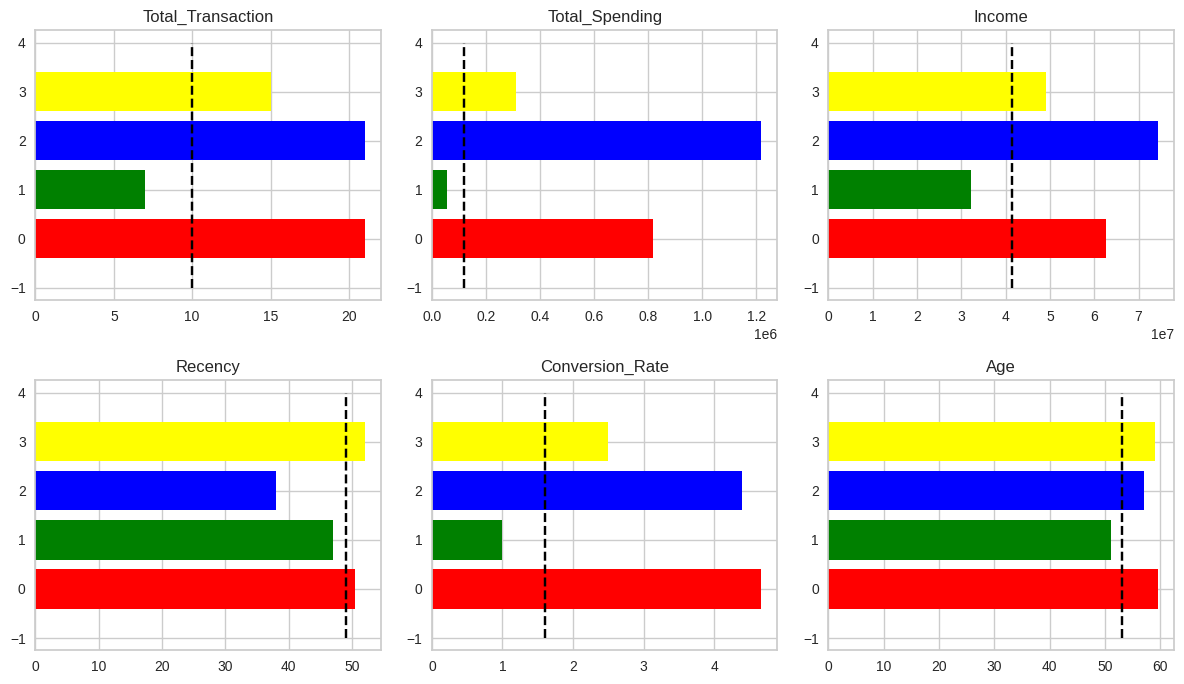

In [53]:
def dist_list(lst):
    plt.figure(figsize=[12, 7])
    i = 1
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(df_cln[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = df_cln.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color= ['red', 'green', 'blue', 'yellow'])
        plt.title(col)
        i = i + 1

dist_list(['Total_Transaction','Total_Spending', 'Income', 'Recency', 'Conversion_Rate', 'Age'])
plt.tight_layout()
plt.show()

Conclusion :
Berdasarkan hasil clustering, diketahui bahwa :
*   Cluster 0
    
    - Rata rata transaksi di cluster 0 dan cluster 2 berada di angka yang sama diangka 21 transaksi.
    - Total spending cukup sedang diangka Rp 816.000/bulan.
    - Income berada di nilai yang cukup tinggi diangka Rp 62.551.500/tahun.
    - Convension rate tertinggi, senilai 5%.
    - Mayoritas usia 60 tahun.
*   Cluster 1

    - Total transaksi terendah, diangka 7 transaksi.
    - Total spending terendah, diangka Rp 54.000/bualn.
    - Income terendah diangka Rp 32.233.000/tahun.
    - Conversion rate terendah, senilai 1%.
    - Mayoritas usia 51 tahun.

*   Cluster 2

    - Rata rata transaksi di cluser 2 sama dengan cluster 0 diangka 21 transaksi.
    - Total spending dan total income tertinggi, dengan total spending senilai Rp 1.217.000/bulan dan income	Rp 74.290.000/tahun.
    - Convesion rate cukup tinggi diangka 4%.
    - Mayoritas usia 57 tahun.

*   Cluster 3

    - Rata rata transaksi cukup sedang diangka 15 transaksi.
    - Total spending cukup sedang cinderung rendah diangka Rp 311.000/bulan.
    - Total Income cukup sedang cinderung rendah diangka Rp	49.176.500/tahun.
    - Conversion rate cinderung rendah diangka 2%.
    - Mayoritas usia 59 tahun.

Kesimpulan :
* Cluster 0 : High transaction, high spending, high income. (High Customer 1)
* Cluster 1 : Low transaction, low spending, low income. (Low Customer )
* Cluster 2 : High transaction, high spending, high income. (High Customer 2)
* Cluster 3 : Moderate transaction, moderate spending, moderate income. (Moderate Customer)

# Percentage

In [54]:
# persentase total customer setiap cluster
cluster_count = data_summary['Cluster'].value_counts().reset_index()
cluster_count['percentage (%)'] = round((cluster_count['count']/len(data_summary))*100,2)
cluster_count = cluster_count.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_count

,Cluster,count,percentage (%)
0,0,254,17.30
1,1,835,56.88
2,2,47,3.20
3,3,332,22.62


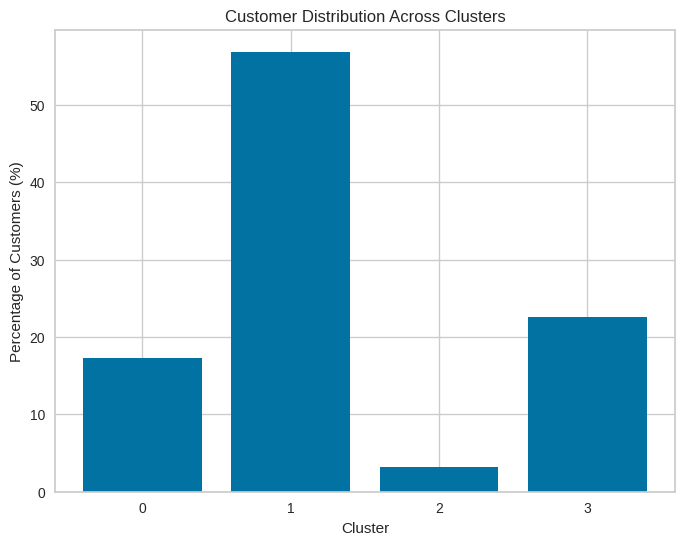

In [55]:
# visualisasi cluster count
plt.figure(figsize=(8, 6))
plt.bar(cluster_count['Cluster'], cluster_count['percentage (%)'])
plt.xlabel('Cluster')
plt.ylabel('Percentage of Customers (%)')
plt.title('Customer Distribution Across Clusters')
plt.xticks(cluster_count['Cluster'])
plt.show()

Business Insight :

* Lebih dari 50% customer berada di cluster low, dengan total transaksi yang rendah, total spending rendah, serta pendapatan rendah. Meskipun demikian, perusahaan harus memperhatikan cluster ini karena tingginya populasi.
* Cluster 0 dan 2 termasuk dalam high cluster, namun populasinya rendah sehingga perusahaan harus mempertimbangkan strategi pemasaran untuk mempertahankan loyalitas cluster ini.

# Univariate Analysis

In [66]:
variable = [ 'Recency', 'Total_Transaction', 'Total_Spending', 'Income', 'NumWebVisitsMonth', 'Total_Acc_Cmp', 'Conversion_Rate']

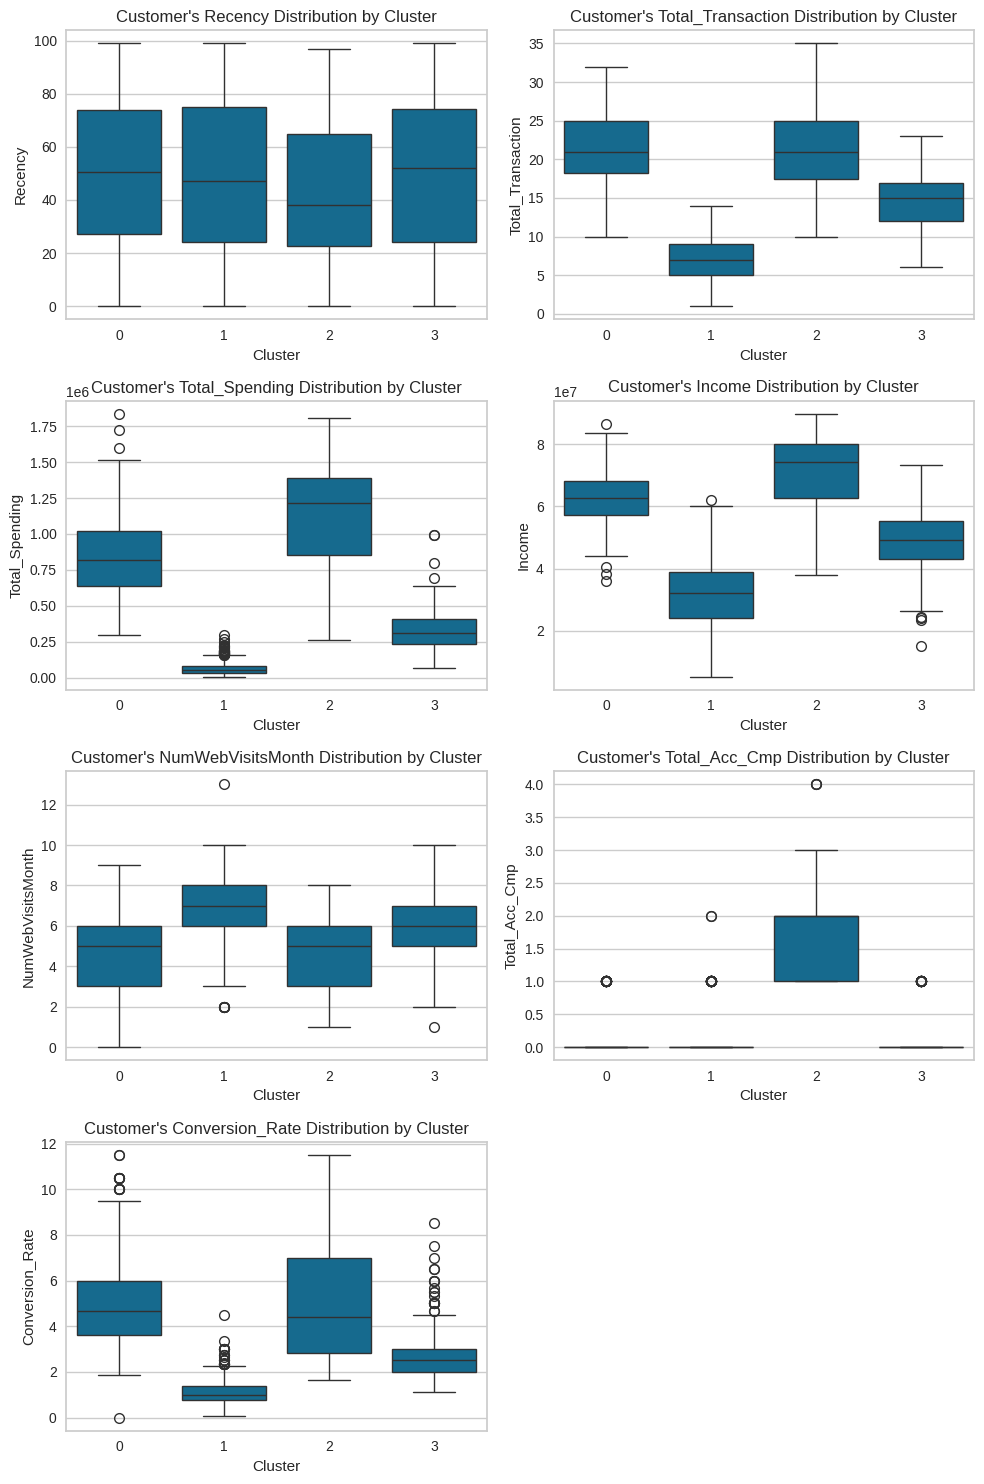

In [75]:
#distribusi cluster hasil
plt.figure(figsize=(10, 15))
for i in range(0, len(variable)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='Cluster', y=df_cln[variable[i]], data=df_cln).set(title=f'Customer\'s {variable[i]} Distribution by Cluster')
    plt.tight_layout()
plt.show()

Insight :
* Cluster 1 memiliki NumVisitsMonth yang paling tinggi namun dengan TotalSpending terendah. Hal ini menunujkan bahwa mereka sangat sering mengunjungi website namun tidak melakukan transaksi. Perusahaan harus memperhatikan fenomena ini mengingat cluster ini adalah cluster dengan populasi yang paling besar sehingga perusahaan perlu mengembangkan strategi untuk menarik perhatian mereka.
* Cluster 2 memiliki tingkat accept campaign yang paling besar, cluster ini juga memilki total spending yang paling besar. Hal ini menunjukan bahwa mereka sangat sensitif terhadap campain yang ditawarkan namun terlihat juga bahwa mereka memiliki NumVisitsMonth yang rendah dengan kata lain mereka jarang membuka website. Dengan ini perusahaan dapat memaksimalkan promosi dengan mengubungi melalui email, whatsapp, atau media lainnya agar mampu menjangkau segmen ini.
* Cluster 3 memiliki spending, visit month, dan conversion rate yang semua berada di nilai rata-rata. Pelanggan ini berpotensi untuk ditingkatkan kontribusinya (potential growth) dengan cara analisis tambahan untuk memahami apa yang mendorong perilaku belanja mereka seperti preferensi produk, memberikan penawaran yang relevan secara personal seperti memberi diskon tambahan untuk pembelian berulang, dan memberikan program loyalitas yang menarik.

# Multivariate Analysis

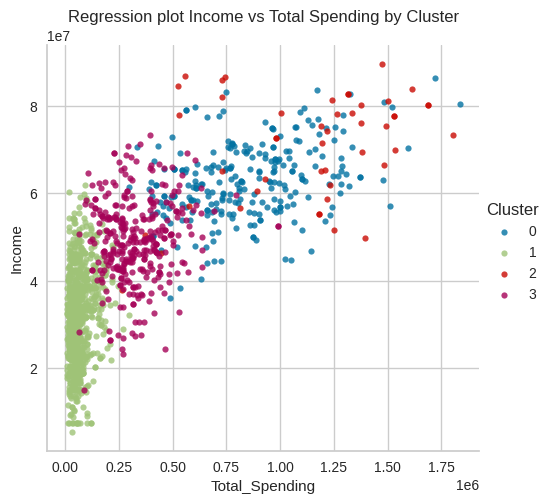

In [56]:
sns.lmplot(y='Income', x='Total_Spending', hue='Cluster', fit_reg=False, data=df_cln,  scatter_kws={'s':20, 'alpha':0.8}).set(
    title='Regression plot Income vs Total Spending by Cluster')

Kesimpulan :
* Secara keseluruhan, terdapat korelasi positif antara pendapatan dan pengeluaran
* Semakin tinggi pendapatan, semakin tinggi pengeluaran.
* Terlihat bahwa High cluster 0 dan 3 cenderung berada dalam satu kelompok, yaitu dalam kategori high customer.
Dengan mengetahui pola korelasi ini, perusahaan dapat mengoptimalkan strategi pemasaran dan penawaran produk mereka.

# Recomendation

Dari hasil analisis, kita dapat mengenali karakteristik atau profil pelanggan berdasarkan kluster yang ada. Memahami karakteristik ini sangat penting untuk merancang strategi pemasaran yang lebih tepat sasaran. Dengan mengetahui preferensi, kebutuhan, dan perilaku konsumen di setiap kluster, perusahaan dapat menciptakan kampanye yang lebih relevan dan menarik bagi masing-masing kelompok pelanggan.

## Cluster 1 (Low Customer - Low Transaction, Low Spending, Low Income):

* Memiliki proporsi pelanggan terbesar (lebih dari 50%).
* Mayoritas pelanggan berada dalam kategori ini, yang berarti sebagian besar basis pelanggan memiliki kemampuan dan aktivitas ekonomi yang rendah.
* Insight Bisnis:

  - Strategi pemasaran dan promosi yang terjangkau dapat diutamakan untuk kelompok ini.
  - Berikan edukasi atau penawaran khusus untuk meningkatkan transaksi dan loyalitas pelanggan.
  - Identifikasi peluang untuk meningkatkan pendapatan mereka (misalnya, melalui layanan kredit kecil atau bundling produk).


## Cluster 0 (High Customer 1 - High Transaction, High Spending, High Income):

* Proporsi pelanggan ini lebih kecil dibandingkan Cluster 1, tetapi lebih signifikan dibandingkan Cluster 2.
* Insight Bisnis:
  - Fokus pada layanan premium atau eksklusif untuk mempertahankan pelanggan ini.
  - Peluang untuk cross-selling atau up-selling produk dengan margin lebih tinggi.
  - Perhatikan loyalitas mereka melalui program VIP atau reward khusus.


## Cluster 2 (High Customer 2 - High Transaction, High Spending, High Income):

* Proporsi pelanggan sangat kecil (di bawah 5%).
* Insight Bisnis:
  - Kelompok ini merupakan segmen potensial dengan nilai tinggi; perlu dilakukan analisis lebih mendalam untuk memahami kebutuhan mereka.
  - Investasi dalam mempertahankan pelanggan ini sangat penting karena kontribusi mereka terhadap pendapatan perusahaan bisa signifikan.


## Cluster 3 (Moderate Customer - Moderate Transaction, Moderate Spending, Moderate Income):

* Memiliki proporsi pelanggan yang cukup besar setelah Cluster 1 (sekitar 20%-30%).
* Insight Bisnis:
  - Segmen ini dapat diarahkan untuk meningkatkan pengeluaran mereka melalui promosi produk atau layanan yang sesuai dengan daya beli mereka.
  - Berikan pengalaman yang lebih personal untuk menarik mereka menuju Cluster 0 atau 2.